<a href="https://colab.research.google.com/github/fosky95/AA_Practica_Final_Grupo_9/blob/main/AA_Practica_Final_Grupo_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ALGORITMO GENÉTICO II
Durante este año y el pasado, se vieron muchos ejemplos de modelos de aprendizaje automático para que mediante diversos algoritmos se puedan solcionar problemas. Por ejemplo, mediante redes neuronales se puede comprobar si una crítica de cine es positiva o negativa respecto a la misma. 

Este año se ha añadido la programación del algoritmo genético y, con la oportunidad de realizar un trabajo libre, se ha escogido este método de resolución de problemas para profundizar un poco más en este y aprender más para poder utilizarlo en el día de mañana.

Al parecer, en el apartado de optimización de problemas de las matemáticas hay varias funciones que se pueden optimizar de maneras increiblemente complejas y se quiere llegar a la conclusión de cómo un problema complicado se puede llegar a simplificar.

Para este ejercicio se ha escogido la **función Schaffer número 4** dentro del campo de las optimizaciones, que es la siguiente:


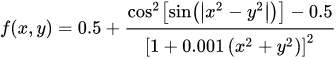

Y además se aprovechará para poder corregir de la práctica anterior  y mejorar en base a dicha práctica.

In [147]:
# Descargamos librerías usando pip
!pip install deap
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install scoop

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [148]:
# Importamos las librerías necesarias

# Librerias para números
import random
import math
import numpy as np

# Librerías para generar la población
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

# Librerias para representar gráficas
import matplotlib.pyplot as plt
from matplotlib import cm

In [149]:
# Escribir la función 
def func(x):
  for i in range(len(x)):
    if x[i] > 100 or x[i] < -100:
      return -1,
  res = 0.5 + (((np.cos(np.sin(np.abs((x[0]**2)-(x[1]**2))))**2) - 0.5)/((1+(0.001*((x[0]**2)+x[1]**2)))**2))
  return res,

func([0, 0]) #Comprobamos que la función funciona

(1.0,)

Para poder emplear el algoritmo genético se deben usar números aleatorios, y se crean de esta manera:

In [150]:
# Números aleatorios
random.seed(0) #Usaremos los mismos numeros aleatorios para poder hacer pruebas
x = [random.uniform(-100, 100) for i in range(10)]
y = [random.uniform(-100, 100) for i in range(10)]

# Y ahora, generamos los vectores para tener valores de entre -100 y 100
x = np.linspace(-100, 100, 1000)
y = np.linspace(-100, 100, 1000)

Y a continuación procedemos a comprobar la función en una gráfica 3d:

In [151]:
# Cogemos los valores para representarlos en la función
x_ax, y_ax = np.meshgrid(x, y)
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
fx = np.reshape([func(val) for val in vals],(1000, 1000))

Text(0.5, 0, 'f(x,y)')

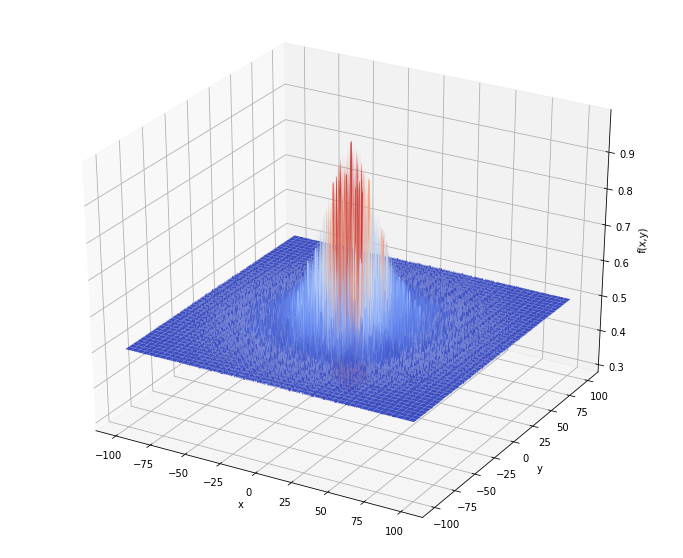

In [152]:
# Y los representamos
figure_3d = plt.figure(figsize=(12,10))
ax = figure_3d.gca(projection="3d")
ax.plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")

Se ve en la función que hay varios picos locales, pero que por la zona del (0,0), más o menos, se encuentra el máximo global que es el que interesa. 

Para poder hallar dicho punto, se empieza a crear los objetos del problema:

# 50,-50

In [153]:
# Creamos los objetos del problema
creator.create("FitnessMax", base.Fitness, weights=(1.0,)) #tipo del problema
creator.create("Individual", list, fitness=creator.FitnessMax) #individuo y sus atributos

Ahora se define la herramienta toolbox para registrar una serie de funciones que se usarán en el algoritmo.

In [154]:
# Toolbox
toolbox = base.Toolbox()

Ahora, se registran las funciones que se necesitan

Se ve que los picos empiezan a formarse entre 50 y -50, por lo que se decide obtener números aleatorios de esa franja, pero si el algoritmo falla, se puede reducir el umbral porque se puede apreciar por donde está el máximo global.

In [155]:
# Genes
toolbox.register("attr_uniform", random.uniform, -50, 50) 
toolbox.attr_uniform() #esta función genera un número aleatorio entre -50 y 50

-18.985243068066737

In [156]:
# Individuo
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2) #individuo

El individuo tiene un atributo que es fitness. Este sirve para evaluar al individuo, pero por ahora esta vacío

In [157]:
# Fitness
#individuo.fitness.values  (aún no se ha creado el individuo)

In [158]:
# Población
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 20)
pob = toolbox.population()
pob

[[22.98317482601287, 39.88382879679935],
 [18.39839319154413, -2.7857284547286625],
 [-39.929879193163416, -6.582816454621629],
 [11.088697344380158, 41.30110532378983],
 [46.66063677707588, -2.2990223447283],
 [36.530992777164, -23.95076896080406],
 [30.502782701302237, 4.8699303835589305],
 [-48.59582998359811, 21.97046864039541],
 [-10.117645777573124, 32.484497714823306],
 [16.81532012318509, -49.885718068557175],
 [-0.6422133534675325, 36.760277549278086],
 [-25.6089123112868, -17.479563725260995],
 [37.047123210865465, -30.893290849760945],
 [6.75107406206719, -26.13840713847798],
 [46.75402502901433, 30.31794692798701],
 [-5.203042856442963, -41.95541814474646],
 [-17.99453953274542, 0.7940642520573888],
 [43.28338242269068, -39.09421540688963],
 [5.126724609055124, 20.656140986688968],
 [4.744091132842378, 31.4466863291336]]

Para la función de población, se necesita la función de individuo. Se crea una lista de individuos, se empieza con 20 para ver cómo evoluciona y si se ve que se necesitan más, pues se realiza de nuevo aumentando el número de individuos.

También se necesita la función Hall Of Fame, donde se obtienen los mejores resultados

In [159]:
# HoF
hof = tools.HallOfFame(1)
print(hof)

[]


Una vez está el Hall of Fame, se necesita un objeto para generar las estadísticas.

In [160]:
# Estadísticas
stats = tools.Statistics(lambda ind: ind.fitness.values)
print(stats)

Y también hay que poner qué atributos tiene la clase estadística

In [161]:
# Atributos de estadística
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

Ahora que estan las funciones, se introduce el registro de la evolución del algoritmo. Además, se mete la función evaluar.

In [162]:
# Evaluar la función
toolbox.register("evaluate", func)

Ahora se puede poner un ejemplo de un individuo.

In [163]:
# Ejemplo de la generación de un individuo aleatorio
individuo = toolbox.individual()
individuo

[4.028360697032397, 46.38385459738009]

In [164]:
# Cruce
toolbox.register("mate", tools.cxOnePoint)

In [165]:
# Mutación
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)

In [166]:
# Selección
toolbox.register("select", tools.selTournament, tournsize=3)

In [167]:
# Registro de la evolución
logbook = tools.Logbook()
pob, logbook = algorithms.eaSimple(pob, toolbox, cxpb=0,
                                       mutpb=0, ngen=0, stats=stats,
                                       halloffame=hof, verbose=True)
print(logbook)

gen	nevals	avg     	std      	min     	max     
0  	20    	0.520546	0.0656821	0.406986	0.698736
gen	nevals	avg     	std      	min     	max     
0  	20    	0.520546	0.0656821	0.406986	0.698736


Una vez se han visto las funciones necesarias, se meten en un bucle para poder tener varias generaciones.

## Cruce con un punto de Cruce

In [168]:
# Función de poblacion, individuo...
def main():
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

In [169]:
# Se introducen los mejores valores en una lista
lista_mejores = list()
# Iteramos 20 veces, que son el número de generaciones
for i in range(20):
    # Fijamos la semilla
    random.seed(i)
    best, log = main()
    lista_mejores.append(best[0].fitness.values)

# Mostramos los resultados. Luego, calculamos la media
media = np.mean(lista_mejores)
mejor_total = max(lista_mejores)
print("media: %f" %media)
print("mejor: %f" %mejor_total)

gen	nevals	avg     	std      	min     	max     
0  	20    	0.512974	0.0775506	0.370004	0.683199
1  	13    	0.511376	0.076836 	0.38353 	0.683199
2  	15    	0.53143 	0.0697482	0.346834	0.683199
3  	15    	0.549328	0.0897338	0.42257 	0.834841
4  	4     	0.61092 	0.0682729	0.535489	0.834841
5  	7     	0.685726	0.128609 	0.395805	0.834841
6  	12    	0.801647	0.0673083	0.625895	0.834841
7  	14    	0.795725	0.129959 	0.346842	0.896172
8  	15    	0.796503	0.136944 	0.363536	0.896172
9  	7     	0.863264	0.0299734	0.834841	0.896172
10 	9     	0.890039	0.0183995	0.834841	0.896172
11 	8     	0.896172	1.11022e-16	0.896172	0.896172
12 	11    	0.896172	1.11022e-16	0.896172	0.896172
13 	14    	0.897536	0.0059443  	0.896172	0.923447
14 	11    	0.8989  	0.00818229 	0.896172	0.923447
15 	8     	0.885569	0.0720693  	0.574998	0.923447
16 	11    	0.882428	0.129407   	0.321264	0.923447
17 	14    	0.868097	0.162105   	0.343635	0.923447
18 	6     	0.921797	0.00719345 	0.890441	0.923447
19 	12    	0.899383	0.11

Y una vez habiendo realizado el algoritmo, se ven los resultados obtenidos.

In [170]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    # ax1.fill_between(gen, fit_mins, fit_maxs, where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-5, 5])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

gen	nevals	avg     	std      	min     	max     
0  	20    	0.512721	0.0741211	0.431735	0.783191
1  	12    	0.575255	0.127602 	0.381551	0.783191
2  	15    	0.597981	0.120225 	0.470087	0.783191
3  	11    	0.711976	0.0981904	0.529125	0.783191
4  	8     	0.783191	1.11022e-16	0.783191	0.783191
5  	17    	0.783191	1.11022e-16	0.783191	0.783191
6  	8     	0.783191	1.11022e-16	0.783191	0.783191
7  	12    	0.774012	0.0416518  	0.592578	0.790217
8  	12    	0.784245	0.00250875 	0.783191	0.790217
9  	10    	0.770656	0.0627705  	0.497362	0.790217
10 	10    	0.787055	0.00349534 	0.783191	0.790217
11 	10    	0.789514	0.00210777 	0.783191	0.790217
12 	15    	0.7962  	0.0260791  	0.790217	0.909876
13 	13    	0.79255 	0.0740248  	0.539255	0.909876
14 	14    	0.782402	0.133753   	0.376073	0.909876
15 	14    	0.818876	0.10939    	0.537476	0.909876
16 	17    	0.88718 	0.0567391  	0.695279	0.909876
17 	9     	0.883113	0.116657   	0.374619	0.909876
18 	12    	0.907085	0.0121658  	0.854056	0.909876
19 	8     

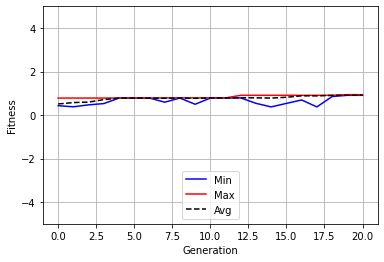

In [171]:
# Generación de población
random.seed(42)
best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

In [ ]:
func(best[0])

## Cruce con dos puntos de cruce

In [172]:
# Cruce
toolbox.register("mate", tools.cxTwoPoint)

In [173]:
# Función de poblacion, individuo...
def main():
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

In [174]:
# Se introducen los mejores valores en una lista
lista_mejores = list()
# Iteramos 20 veces, que son el número de generaciones
for i in range(20):
    # Fijamos la semilla
    random.seed(i)
    best, log = main()
    lista_mejores.append(best[0].fitness.values)

# Mostramos los resultados. Luego, calculamos la media
media = np.mean(lista_mejores)
mejor_total = max(lista_mejores)
print("media: %f" %media)
print("mejor: %f" %mejor_total)

gen	nevals	avg     	std      	min     	max     
0  	20    	0.512974	0.0775506	0.370004	0.683199
1  	11    	0.511934	0.0740527	0.38353 	0.683199
2  	15    	0.581349	0.0809584	0.485188	0.834841
3  	14    	0.681614	0.113781 	0.483193	0.834841
4  	14    	0.741357	0.112337 	0.367033	0.834841
5  	11    	0.804512	0.0606569	0.683199	0.834841
6  	17    	0.827259	0.0330497	0.683199	0.834841
7  	15    	0.81384 	0.104646 	0.360607	0.88906 
8  	10    	0.840263	0.0162657	0.834841	0.88906 
9  	13    	0.835942	0.0551623	0.614656	0.88906 
10 	12    	0.869905	0.0244638	0.834841	0.88906 
11 	15    	0.886349	0.0118168	0.834841	0.88906 
12 	15    	0.88906 	2.22045e-16	0.88906 	0.88906 
13 	13    	0.875755	0.0579934  	0.622968	0.88906 
14 	11    	0.876172	0.0561775  	0.6313  	0.88906 
15 	13    	0.88906 	2.22045e-16	0.88906 	0.88906 
16 	16    	0.889351	0.00126934 	0.88906 	0.894884
17 	10    	0.88906 	2.22045e-16	0.88906 	0.88906 
18 	16    	0.88906 	2.22045e-16	0.88906 	0.88906 
19 	10    	0.88906 	2.2204

Resultados:

In [175]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    # ax1.fill_between(gen, fit_mins, fit_maxs, where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-5, 5])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

gen	nevals	avg     	std      	min     	max     
0  	20    	0.512721	0.0741211	0.431735	0.783191
1  	12    	0.560038	0.132756 	0.381551	0.783191
2  	15    	0.571351	0.133815 	0.376684	0.783191
3  	16    	0.687083	0.136886 	0.381551	0.783191
4  	9     	0.775342	0.0423991	0.593201	0.816201
5  	6     	0.783154	0.0257154	0.683408	0.816201
6  	14    	0.785345	0.0463028	0.595191	0.816201
7  	14    	0.804767	0.015841 	0.783191	0.818595
8  	10    	0.81503 	0.00736589	0.783191	0.818595
9  	12    	0.816117	0.0070462 	0.785798	0.818595
10 	11    	0.823314	0.0147857 	0.816201	0.875018
11 	14    	0.827469	0.0180191 	0.818595	0.875018
12 	15    	0.826691	0.0643928 	0.560913	0.875018
13 	14    	0.8266  	0.106195  	0.373754	0.875018
14 	14    	0.866573	0.0133504 	0.818595	0.875018
15 	12    	0.849934	0.105711  	0.389403	0.875018
16 	13    	0.856614	0.0870338 	0.478222	0.903735
17 	11    	0.879326	0.010254  	0.875018	0.903735
18 	15    	0.886505	0.0140684 	0.875018	0.903735
19 	9     	0.902299	0.0062587

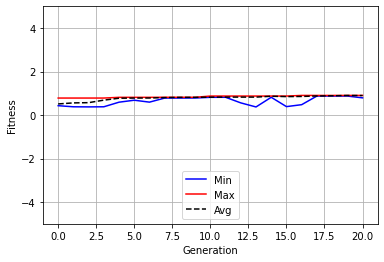

In [176]:
# Generación de población
random.seed(42)
best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

In [ ]:
func(best[0])

## Cruce uniforme

In [177]:
# Cruce
toolbox.register("mate", tools.cxUniform, indpb=1)

In [178]:
# Función de poblacion, individuo...
def main():
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

In [179]:
# Se introducen los mejores valores en una lista
lista_mejores = list()
# Iteramos 20 veces, que son el número de generaciones
for i in range(20):
    # Fijamos la semilla
    random.seed(i)
    best, log = main()
    lista_mejores.append(best[0].fitness.values)

# Mostramos los resultados. Luego, calculamos la media
media = np.mean(lista_mejores)
mejor_total = max(lista_mejores)
print("media: %f" %media)
print("mejor: %f" %mejor_total)

gen	nevals	avg     	std      	min     	max     
0  	20    	0.512974	0.0775506	0.370004	0.683199
1  	8     	0.556632	0.0842503	0.397838	0.683199
2  	9     	0.590928	0.0812186	0.427823	0.683199
3  	13    	0.657791	0.0377901	0.567873	0.683199
4  	8     	0.676616	0.00897057	0.664391	0.683199
5  	14    	0.656426	0.0772937 	0.42257 	0.683199
6  	11    	0.670522	0.0552572 	0.429661	0.683199
7  	13    	0.669466	0.05986   	0.408542	0.683199
8  	14    	0.670884	0.0536798 	0.436899	0.683199
9  	11    	0.679529	0.0315157 	0.55312 	0.739887
10 	9     	0.694536	0.0226753 	0.683199	0.739887
11 	14    	0.714377	0.0282021 	0.683199	0.739887
12 	10    	0.724675	0.0339211 	0.605723	0.739887
13 	12    	0.739887	1.11022e-16	0.739887	0.739887
14 	9     	0.739887	1.11022e-16	0.739887	0.739887
15 	12    	0.73947 	0.00181843 	0.731543	0.739887
16 	11    	0.723413	0.0633144  	0.45    	0.739887
17 	5     	0.733053	0.0297898  	0.603202	0.739887
18 	19    	0.706012	0.0729976  	0.482342	0.739887
19 	12    	0.739887

Resultados:

In [180]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    # ax1.fill_between(gen, fit_mins, fit_maxs, where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-5, 5])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

gen	nevals	avg     	std      	min     	max     
0  	20    	0.512721	0.0741211	0.431735	0.783191
1  	14    	0.616843	0.128002 	0.470169	0.783191
2  	14    	0.695639	0.12042  	0.490392	0.783191
3  	10    	0.772499	0.0466046	0.569355	0.783191
4  	13    	0.765894	0.057912 	0.528909	0.783191
5  	13    	0.763998	0.0829833	0.402293	0.783191
6  	14    	0.783191	1.11022e-16	0.783191	0.783191
7  	13    	0.773453	0.0424491  	0.588421	0.783191
8  	11    	0.783191	1.11022e-16	0.783191	0.783191
9  	13    	0.783191	1.11022e-16	0.783191	0.783191
10 	15    	0.764357	0.0638628  	0.491597	0.783191
11 	14    	0.783191	1.11022e-16	0.783191	0.783191
12 	12    	0.783191	1.11022e-16	0.783191	0.783191
13 	14    	0.780282	0.0238059  	0.684058	0.824134
14 	15    	0.76898 	0.0816559  	0.417076	0.824134
15 	12    	0.773462	0.0910839  	0.383895	0.824134
16 	13    	0.807697	0.0240372  	0.741061	0.824134
17 	15    	0.776123	0.13886    	0.303132	0.824134
18 	14    	0.824134	0          	0.824134	0.824134
19 	15    	0.8

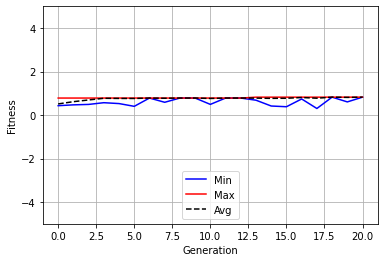

In [181]:
# Generación de población
random.seed(42)
best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

In [ ]:
func(best[0])

Se puede observar que se obtienen números bajos, cerca del 0,0 (concretamente (0, 1.25313)/(0, -1.25313)/(1.25313, 0)/(-1.25313, 0)) pero no lo suficiente, por lo que se va a disminuir el umbral inicial de 50,-50 a 10,-10 y se va a aumentar en 10 las épocas, por si acaso.

# 10,-10

Para este caso, recreamos todos los objetos y las funciones para que no haya problemas.

In [279]:
# Creamos los objetos del problema
creator.create("FitnessMax", base.Fitness, weights=(1.0,)) #tipo del problema
creator.create("Individual", list, fitness=creator.FitnessMax) #individuo y sus atributos

In [280]:
# Toolbox
toolbox = base.Toolbox()

In [281]:
# Genes
toolbox.register("attr_uniform", random.uniform, -10,10) 
toolbox.attr_uniform() #esta función genera un número aleatorio entre -10 y 10

-9.202455031491613

In [282]:
# Individuo
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2) #individuo

También aumentamos en 10 la población para aumentar la probabilidad de acertar

In [283]:
# Población
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 30)
pob = toolbox.population()
pob

[[7.713203179975899, -2.372547847638664],
 [5.924131713060687, -7.732519449908148],
 [-4.868188866937562, 4.479512167398481],
 [-9.505885405639422, 0.33735645146802895],
 [5.409886445843881, 0.2861812416936065],
 [0.1747118600542681, -0.2639058166963366],
 [-4.071320608514308, 3.0305639196205707],
 [-3.593744857028918, -8.353091039029984],
 [-8.080871378273546, 9.432575398128659],
 [5.466370364721838, 0.664116443295864],
 [2.5386615195083344, -5.7843705012895],
 [2.590289678213338, -5.736497362710409],
 [3.7081036603762882, 6.713301554907382],
 [-5.888408640361695, 6.574973419717381],
 [7.572744634184826, 4.827500697256138],
 [-1.295244746422597, 6.335086962543592],
 [-8.557590134905158, 3.7208707859746486],
 [-9.524941077943858, 4.33736567671826],
 [-9.242273705077038, -8.535039416809669],
 [-6.440156728891315, -4.961839980172485],
 [-8.591158155357498, 6.4323863726326245],
 [8.219731488622418, -1.8473444300841386],
 [-0.9774867251191655, -1.9110395859144589],
 [-3.671915081606663, -2

In [284]:
# HoF
hof = tools.HallOfFame(1)
print(hof)

[]


In [285]:
# Estadísticas
stats = tools.Statistics(lambda ind: ind.fitness.values)
print(stats)

In [286]:
# Atributos de estadística
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

In [287]:
# Evaluar la función
toolbox.register("evaluate", func)

In [288]:
# Ejemplo de la generación de un individuo aleatorio
individuo = toolbox.individual()
individuo

[-4.369651114154722, 8.533817594897172]

In [289]:
# Cruce
toolbox.register("mate", tools.cxOnePoint)

In [290]:
# Mutación
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)

In [291]:
# Selección
toolbox.register("select", tools.selTournament, tournsize=3)

In [292]:
# Registro de la evolución
logbook = tools.Logbook()
pob, logbook = algorithms.eaSimple(pob, toolbox, cxpb=0,
                                       mutpb=0, ngen=0, stats=stats,
                                       halloffame=hof, verbose=True)
print(logbook)

gen	nevals	avg    	std     	min     	max     
0  	30    	0.62077	0.221494	0.343843	0.998371
gen	nevals	avg    	std     	min     	max     
0  	30    	0.62077	0.221494	0.343843	0.998371


Y ahora se pasa a comprobar los resultados

## Cruce con un punto de Cruce

In [293]:
# Función de poblacion, individuo...
def main():
    CXPB, MUTPB, NGEN = 0.5, 0.2, 30
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

In [294]:
# Se introducen los mejores valores en una lista
lista_mejores = list()
# Iteramos 30 veces, que son el número de generaciones
for i in range(30):
    # Fijamos la semilla
    random.seed(i)
    best, log = main()
    lista_mejores.append(best[0].fitness.values)

# Mostramos los resultados. Luego, calculamos la media
media = np.mean(lista_mejores)
mejor_total = max(lista_mejores)
print("media: %f" %media)
print("mejor: %f" %mejor_total)

gen	nevals	avg     	std     	min     	max     
0  	30    	0.639336	0.203755	0.322159	0.991555
1  	21    	0.675585	0.205149	0.326184	0.94519 
2  	22    	0.657541	0.223188	0.294637	0.94519 
3  	12    	0.784195	0.181584	0.308556	0.94519 
4  	15    	0.837564	0.175125	0.313767	0.958071
5  	25    	0.846479	0.153194	0.319128	0.958071
6  	12    	0.877344	0.155979	0.343746	0.958071
7  	17    	0.908677	0.105011	0.365845	0.958071
8  	17    	0.940863	0.0246029	0.8857  	0.958071
9  	15    	0.948173	0.0219706	0.8857  	0.958071
10 	17    	0.95244 	0.0303271	0.789123	0.958071
11 	19    	0.939159	0.101848 	0.390693	0.958071
12 	11    	0.953301	0.0186922	0.865007	0.958071
13 	16    	0.958071	0        	0.958071	0.958071
14 	20    	0.919978	0.142536 	0.382363	0.958071
15 	20    	0.900837	0.147733 	0.32435 	0.958071
16 	13    	0.958071	0        	0.958071	0.958071
17 	13    	0.95157 	0.0350119	0.763025	0.958071
18 	15    	0.919717	0.135272 	0.334155	0.958071
19 	16    	0.958071	0        	0.958071	0.958071
2

In [295]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    # ax1.fill_between(gen, fit_mins, fit_maxs, where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-5, 5])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

gen	nevals	avg     	std     	min     	max     
0  	30    	0.656013	0.235508	0.299838	0.982608
1  	15    	0.822915	0.193192	0.339978	0.982608
2  	18    	0.800562	0.267007	0.310781	0.982608
3  	24    	0.88428 	0.2256  	0.310781	0.982608
4  	19    	0.982608	1.11022e-16	0.982608	0.982608
5  	11    	0.982608	1.11022e-16	0.982608	0.982608
6  	22    	0.982608	1.11022e-16	0.982608	0.982608
7  	20    	0.962678	0.107328   	0.384699	0.982608
8  	17    	0.961967	0.111156   	0.363373	0.982608
9  	16    	0.960894	0.116934   	0.331182	0.982608
10 	14    	0.972543	0.0376988  	0.824852	0.982608
11 	15    	0.954976	0.115909   	0.36519 	0.982608
12 	23    	0.981404	0.00576386 	0.950621	0.982608
13 	21    	0.943236	0.147551   	0.359925	0.982608
14 	17    	0.961634	0.112948   	0.353388	0.982608
15 	15    	0.939881	0.160287   	0.29684 	0.982608
16 	15    	0.982608	1.11022e-16	0.982608	0.982608
17 	15    	0.97203 	0.0569622  	0.66528 	0.982608
18 	18    	0.982608	1.11022e-16	0.982608	0.982608
19 	20    	0.95

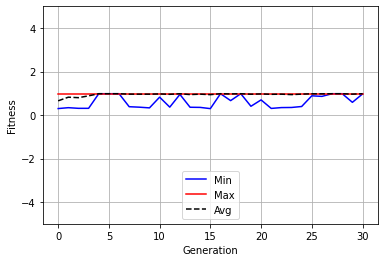

In [296]:
# Generación de población
random.seed(42)
best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

In [297]:
func(best[0])

(0.982607956494054,)

Se ve que ha mejorado bastante en comparación con el umbral anterior. A ver cómo se comporta con el resto de cruces

## Cruce con dos puntos de cruce

In [298]:
# Cruce
toolbox.register("mate", tools.cxTwoPoint)

In [299]:
# Función de poblacion, individuo...
def main():
    CXPB, MUTPB, NGEN = 0.5, 0.2, 30
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

In [300]:
# Se introducen los mejores valores en una lista
lista_mejores = list()
# Iteramos 30 veces, que son el número de generaciones
for i in range(30):
    # Fijamos la semilla
    random.seed(i)
    best, log = main()
    lista_mejores.append(best[0].fitness.values)

# Mostramos los resultados. Luego, calculamos la media
media = np.mean(lista_mejores)
mejor_total = max(lista_mejores)
print("media: %f" %media)
print("mejor: %f" %mejor_total)

gen	nevals	avg     	std     	min     	max     
0  	30    	0.639336	0.203755	0.322159	0.991555
1  	21    	0.703965	0.203559	0.326184	0.94519 
2  	19    	0.707175	0.194331	0.302585	0.94519 
3  	15    	0.77113 	0.169375	0.375481	0.94519 
4  	18    	0.800351	0.20721 	0.313767	0.968475
5  	20    	0.842994	0.17602 	0.324956	0.999585
6  	21    	0.892196	0.160018	0.397413	0.999585
7  	16    	0.927672	0.165122	0.302812	0.999585
8  	15    	0.988066	0.023319	0.901917	0.999585
9  	20    	0.979081	0.110425	0.384421	0.999626
10 	17    	0.978379	0.111041	0.380638	0.999626
11 	17    	0.984458	0.0814975	0.54558 	0.999626
12 	21    	0.999604	2.0614e-05	0.999585	0.999626
13 	24    	0.977803	0.117474  	0.345185	0.999626
14 	19    	0.947746	0.134304  	0.472109	0.999626
15 	22    	0.982766	0.0907932 	0.49383 	0.999626
16 	11    	0.999626	3.33067e-16	0.999626	0.999626
17 	17    	0.985194	0.0589633  	0.67935 	0.999626
18 	12    	0.988339	0.060781   	0.661023	0.999626
19 	17    	0.999626	3.33067e-16	0.999626	0

Resultados:

In [301]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    # ax1.fill_between(gen, fit_mins, fit_maxs, where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-5, 5])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

gen	nevals	avg     	std     	min     	max     
0  	30    	0.656013	0.235508	0.299838	0.982608
1  	18    	0.686004	0.243119	0.314283	0.982608
2  	20    	0.861162	0.192324	0.310781	0.982608
3  	25    	0.94214 	0.121121	0.396539	0.985732
4  	19    	0.945021	0.119651	0.442125	0.985732
5  	21    	0.941773	0.152443	0.356771	0.985732
6  	19    	0.983129	0.00116438	0.982608	0.985732
7  	20    	0.984066	0.0015587 	0.982608	0.985732
8  	19    	0.963986	0.114212  	0.348965	0.985732
9  	16    	0.957749	0.123759  	0.310437	0.985732
10 	20    	0.970856	0.0801123 	0.539438	0.985732
11 	16    	0.961146	0.12318   	0.29967 	0.985732
12 	20    	0.969355	0.0855694 	0.508758	0.985732
13 	17    	0.977531	0.0441631 	0.739706	0.985732
14 	11    	0.977531	0.0441631 	0.739706	0.985732
15 	18    	0.985732	3.33067e-16	0.985732	0.985732
16 	21    	0.985732	3.33067e-16	0.985732	0.985732
17 	19    	0.952322	0.103179   	0.546   	0.985732
18 	18    	0.964677	0.113385   	0.354082	0.985732
19 	17    	0.985732	3.33067e-1


23 	22    	0.985932	0.00107789 	0.985732	0.991737
24 	18    	0.97184 	0.081538   	0.532933	0.991737
25 	16    	0.988735	0.00300239 	0.985732	0.991737
26 	17    	0.969671	0.113279   	0.359765	0.991737
27 	22    	0.991737	1.11022e-16	0.991737	0.991737
28 	16    	0.969573	0.119359   	0.326803	0.991737
29 	20    	0.991737	1.11022e-16	0.991737	0.991737
30 	12    	0.985775	0.0321073  	0.812872	0.991737
Mejor fitness: 0.991737
Mejor individuo [2.0274875656146722, 2.0303265971567814]


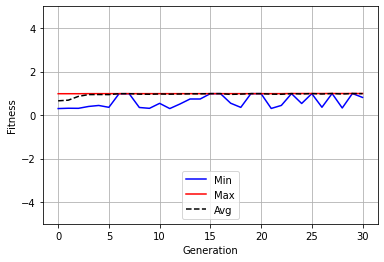

In [302]:
# Generación de población
random.seed(42)
best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

En este caso, los resultados también se acercan al punto óptimo

In [303]:
func(best[0])

(0.9917370888320793,)

## Cruce uniforme

In [304]:
# Cruce
toolbox.register("mate", tools.cxUniform, indpb=1)

In [305]:
# Función de poblacion, individuo...
def main():
    CXPB, MUTPB, NGEN = 0.5, 0.2, 30
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

In [306]:
# Se introducen los mejores valores en una lista
lista_mejores = list()
# Iteramos 30 veces, que son el número de generaciones
for i in range(30):
    # Fijamos la semilla
    random.seed(i)
    best, log = main()
    lista_mejores.append(best[0].fitness.values)

# Mostramos los resultados. Luego, calculamos la media
media = np.mean(lista_mejores)
mejor_total = max(lista_mejores)
print("media: %f" %media)
print("mejor: %f" %mejor_total)

gen	nevals	avg     	std     	min     	max     
0  	30    	0.639336	0.203755	0.322159	0.991555
1  	14    	0.779167	0.135554	0.422029	0.991555
2  	19    	0.876177	0.0616025	0.748103	0.991555
3  	16    	0.930492	0.0502082	0.814452	0.991555
4  	14    	0.966787	0.0617367	0.683485	0.991555
5  	20    	0.991555	3.33067e-16	0.991555	0.991555
6  	15    	0.938707	0.163702   	0.323082	0.991555
7  	21    	0.953187	0.146172   	0.309488	0.991555
8  	15    	0.991555	3.33067e-16	0.991555	0.991555
9  	20    	0.970292	0.114502   	0.353679	0.991555
10 	22    	0.978996	0.0676281  	0.614808	0.991555
11 	18    	0.983215	0.0449085  	0.741376	0.991555
12 	15    	0.991555	3.33067e-16	0.991555	0.991555
13 	22    	0.968347	0.124975   	0.295336	0.991555
14 	11    	0.986105	0.0214034  	0.884616	0.991555
15 	18    	0.956879	0.136753   	0.304028	0.991555
16 	14    	0.980244	0.0609071  	0.652249	0.991555
17 	17    	0.979401	0.0609199  	0.652249	0.991555
18 	10    	0.968506	0.124118   	0.300108	0.991555
19 	14    	0.99

Resultados:

In [307]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    # ax1.fill_between(gen, fit_mins, fit_maxs, where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-5, 5])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

gen	nevals	avg     	std     	min     	max     
0  	30    	0.656013	0.235508	0.299838	0.982608
1  	14    	0.879102	0.124955	0.461529	0.982608
2  	23    	0.959345	0.029974	0.860336	0.982608
3  	11    	0.961315	0.0850545	0.50803 	0.982608
4  	13    	0.965068	0.0944001	0.456708	0.982608
5  	20    	0.929376	0.164697 	0.335135	0.982608
6  	19    	0.962789	0.106729 	0.388037	0.982608
7  	15    	0.966145	0.0886572	0.488711	0.982608
8  	19    	0.982608	1.11022e-16	0.982608	0.982608
9  	19    	0.982608	1.11022e-16	0.982608	0.982608
10 	17    	0.965974	0.0895786  	0.483578	0.982608
11 	10    	0.970124	0.0672293  	0.608083	0.982608
12 	18    	0.982608	1.11022e-16	0.982608	0.982608
13 	12    	0.982608	1.11022e-16	0.982608	0.982608
14 	19    	0.970857	0.0632782  	0.630094	0.982608
15 	19    	0.982608	1.11022e-16	0.982608	0.982608
16 	9     	0.962705	0.107179   	0.38553 	0.982608
17 	20    	0.960076	0.121336   	0.306659	0.982608
18 	22    	0.925343	0.172289   	0.352991	0.982608
19 	23    	0.982608	1.

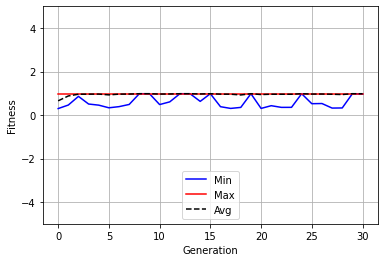

In [308]:
# Generación de población
random.seed(42)
best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

In [309]:
func(best[0])

(0.982607956494054,)

Parece ser que en todos los casos se obtienen mejores resultados al haber reducido el umbral, aunque el resultado final aún quede poco para acercarse al óptimo. Aún así, los resultados satisfacen los requisitos requeridos al comenzar con el trabajo. Se ha podido trabajar más con el algoritmo genético y se ha podido perfeccionar y comprender mejor los valores que se pueden variar para precisar mejor el algoritmo. 

Es cierto que no se ha llegado a ni uno de los cuatro puntos óptimos, pero si que se han quedado cerca. Se ha probado a cambiar el umbral a 5,-5 y se han obtenido resultados más próximos (cerca del 1.5,-1.5). Parece ser que en este tipo de ejercicios lo más importante es saber como colocar el umbral, si hay varios picos máximos en la función o ni o si hay uno pero muy centrado y solo está cerca de 2 puntos. También influye el número de la población y los genes, pero no con tanta importancia.